# Lezione 3


In questa lezione si vogliono prezzare delle opzioni europee Put e Call con il metodo Monte Carlo.

Sia dato un asset price $S_t$ che realizza un moto browoninano geometrico partendo da $S_0=100$ con volatilità $\sigma = 0.25$ e tasso di interesse privo di rischio $r=0.1$. Si vuole calcolare il prezzo di una Put  e di una Call su questo asset in $t=0$, con tempo di consegna $T=1$ e strike price $K=100$.
Eseguiamo questo calcolo con due differenti campionamenti: un camiponamento diretto del prezzo $S_T$ e un campionemnto delle traiettorie del processo $S_t(\omega)$ nell'intervallo $[0,T]$.

## Campionamento diretto

In questo caso viene generato un campione di $10^4$ realizzazioni della variabile aleatoria $S_T = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W_t\right]$ con $W_t\sim\mathcal{N}(0,t)$.
I prezzi delle Put e Call si ottengono calcolando le medie:
$$
P[S_0,0]=< e^{-rT}\max(0,K-S_T)> 
$$
$$
C[S_0,0]=< e^{-rT}\max(0,S_T-K)>.
$$
Suddividendo i campioni  in 100 blocchi, medie e incertezze sono state calcolate con il metodo datablock come nelle lezioni precedenti.

Di seguito sono mostrati gli andamenti di $P[S_0,0]$ e $C[S_0,0]$ in funzione del numero di campionamenti messi a confronto con la soluzione analitica della formula di Black-Sholes.

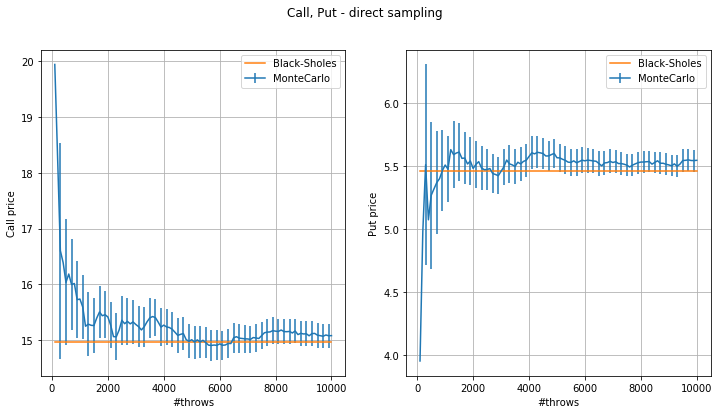

call err = 0.0861599
put err = 0.0861599


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt


#soluzione analitica
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

call, put = black_scholes(S0, K, T, r, sigma)


#DIRECT

plt.figure(figsize=(12,6))

Nthrows, C, errC = np.loadtxt("Call_direct.dat", usecols=(0,1,2), unpack=True)
Nthrows, P, errP = np.loadtxt("Put_direct.dat", usecols=(0,1,2), unpack=True)

#call
plt.subplot(1,2,1)
plt.errorbar(Nthrows ,C, yerr=errC,label='MonteCarlo',errorevery=2)
call = np.array([ call for i in range(len(Nthrows))])
plt.plot(Nthrows, call, label = 'Black-Sholes')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('Call price')


#put
plt.subplot(1,2,2)
plt.errorbar(Nthrows ,P, yerr=errP,label='MonteCarlo',errorevery=2)
put = np.array([ put for i in range(len(Nthrows))])
plt.plot(Nthrows, put, label = 'Black-Sholes')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('Put price')


plt.suptitle('Call, Put - direct sampling')
plt.show()

print("call err = "+str(errP[-1]))
print("put err = "+str(errP[-1]))



I grafici mostrano che c'è un buon accordo tra la stima Monte Carlo e la soluzione analitica.

## Campionamento delle traiettorie

In questo caso viene realizzato un campione di $10^4$ traiettorie di $S_t$ con $t \in [0,1]$.
Nella figura seguente sono raffigurate 100 traiettorie del campione.

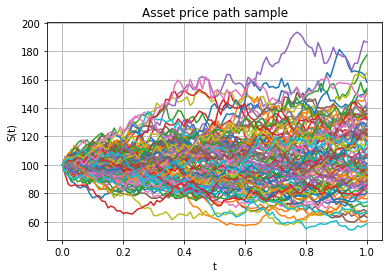

In [5]:
#PATH ASSET PRICE

data = np.loadtxt("paths.dat", unpack = True)
for i in range(1,len(data[:,0])):
   plt.plot(data[0,:],data[i,:])

plt.ylabel('S(t)')
plt.xlabel('t')
plt.title('Asset price path sample')
plt.grid(True)
plt.show()

Considerando per ciascuna traiettoria il prezzo al tempo finale otteniamo un campinone di $S_T$. I prezzi $P[S_0,0]$ e $C[S_0,0]$ vengono calcolati come nel punto precedente e otteniamo i seguenti andamenti:


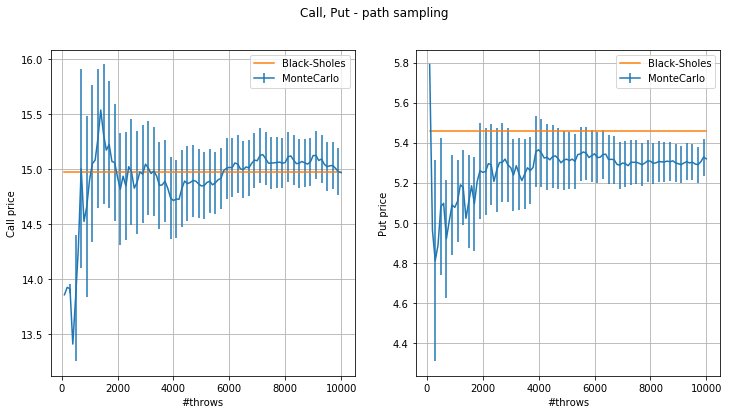

call err = 0.0913513
put err = 0.0913513


In [4]:
#PATH

Nthrows, C, errC = np.loadtxt("Call_path.dat", usecols=(0,1,2), unpack=True)
Nthrows, P, errP = np.loadtxt("Put_path.dat", usecols=(0,1,2), unpack=True)

plt.figure(figsize=(12,6))

#call
plt.subplot(1,2,1)
plt.errorbar(Nthrows ,C, yerr=errC,label='MonteCarlo',errorevery=2)
plt.plot(Nthrows, call, label = 'Black-Sholes')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('Call price')


#put
plt.subplot(1,2,2)
plt.errorbar(Nthrows ,P, yerr=errP,label='MonteCarlo',errorevery=2)
plt.plot(Nthrows, put, label = 'Black-Sholes')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('Put price')


plt.suptitle('Call, Put - path sampling')
plt.show()

print("call err = "+str(errP[-1]))
print("put err = "+str(errP[-1]))


Anche in questo c'è accordo tra la stima Monte Carlo e la soluzione analitica.